In [1]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [2]:
##Prepare data##

filename=r'hinkunuha.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';',decimal=",")
data_train=data_train.drop(['Id'], axis=1)
data_train=data_train.dropna()
#data_train['Sukupuoli'].replace(to_replace=['M'], value=0,inplace=True)
#data_train['Sukupuoli'].replace(to_replace=['N'], value=1,inplace=True)

#print(data_train.head(10))
#df.head()

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')
data_train.to_csv(r'hinkunuha_edited.csv')


DESCRIBE DATA:
                M1          M2          M3     Disease
count  723.000000  723.000000  723.000000  723.000000
mean     0.498075    0.727506    0.236687    0.479945
std      0.279840    0.427757    0.143627    0.499943
min      0.000000    0.000000    0.000000    0.000000
25%      0.247500    0.369500    0.109000    0.000000
50%      0.509000    0.710000    0.228000    0.000000
75%      0.724500    1.092000    0.362000    1.000000
max      1.000000    1.500000    0.500000    1.000000


In [3]:
###Scaling the data###

from sklearn.preprocessing import StandardScaler
colnames = data_train.columns.get_values()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_train))
#df_scaled.head()
print('\nDESCRIBE SCALED DATA:\n',df_scaled.describe())
df_scaled.min()
df_scaled.max()
print('\nSCALED DATA:\n',df_scaled.head(10))
df_scaled.to_excel(r'df_scaled.xlsx')

described_df=df_scaled.describe()
described_df.to_excel(r'df_scaled_Describe.xlsx')



DESCRIBE SCALED DATA:
                   0             1             2             3
count  7.230000e+02  7.230000e+02  7.230000e+02  7.230000e+02
mean   5.835197e-17  1.335953e-16  5.159543e-17 -9.136690e-17
std    1.000692e+00  1.000692e+00  1.000692e+00  1.000692e+00
min   -1.781087e+00 -1.701923e+00 -1.649073e+00 -9.606624e-01
25%   -8.960411e-01 -8.375174e-01 -8.896369e-01 -9.606624e-01
50%    3.906830e-02 -4.095394e-02 -6.052784e-02 -9.606624e-01
75%    8.096843e-01  8.526943e-01  8.730907e-01  1.040948e+00
max    1.794857e+00  1.807167e+00  1.834578e+00  1.040948e+00

SCALED DATA:
           0         1         2         3
0 -0.483020  0.267846 -1.516694 -0.960662
1 -1.233968 -0.569657  1.444410 -0.960662
2  0.446726 -1.070287  1.437442 -0.960662
3  1.494478  0.087713  0.559562  1.040948
4 -0.332830  1.533458  0.914895  1.040948
5 -1.115962  0.108767  0.538660  1.040948
6 -1.613018  0.623434 -0.339220 -0.960662
7  0.210714  1.343967 -1.077754  1.040948
8  0.164226  0.593022  0.

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
X_all = data_train.drop(['Disease'], axis=1)#data_train
#print(X_all)
y_all = data_train['Disease']
#print(y_all.head())
num_test = 10

test_size=100
train_size=620

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, test_size=test_size, train_size=train_size)


    
from sklearn.neighbors import KNeighborsClassifier as KNN
    
k_range=range(10,500)
scores={}
scores_list=[]
error=[]

###Classifier###
for k in k_range:    
    clf = KNN(n_neighbors=k)

    ###Train###
    clf.fit(X_train, y_train)

    ###Predict###
    pre = clf.predict(X_test)

    ###Accuracy of Classifier###
    accuracy_score = metrics.accuracy_score(y_test, pre)
    print(k," ",accuracy_score)

    #Matrix of results
    result_matrix = metrics.confusion_matrix(pre,y_test)
   # print(k,"\n",result_matrix)
    
    scores[k] = metrics.accuracy_score(y_test,pre)

    scores_list.append(accuracy_score)
    
    #Error values
    error.append(np.mean(pre != y_test))
    


10   0.85
11   0.84
12   0.85
13   0.85
14   0.85
15   0.85
16   0.87
17   0.86
18   0.87
19   0.85
20   0.86
21   0.86
22   0.87
23   0.87
24   0.88
25   0.86
26   0.87
27   0.86
28   0.88
29   0.87
30   0.88
31   0.86
32   0.87
33   0.86
34   0.87
35   0.86
36   0.87
37   0.87
38   0.87
39   0.87
40   0.87
41   0.87
42   0.87
43   0.87
44   0.88
45   0.88
46   0.88
47   0.88
48   0.88
49   0.88
50   0.88
51   0.89
52   0.88
53   0.87
54   0.88
55   0.88
56   0.87
57   0.88
58   0.89
59   0.88
60   0.87
61   0.88
62   0.89
63   0.89
64   0.89
65   0.88
66   0.88
67   0.88
68   0.89
69   0.89
70   0.88
71   0.88
72   0.88
73   0.88
74   0.88
75   0.87
76   0.87
77   0.87
78   0.87
79   0.87
80   0.88
81   0.86
82   0.86
83   0.86
84   0.87
85   0.86
86   0.87
87   0.87
88   0.87
89   0.86
90   0.86
91   0.86
92   0.87
93   0.88
94   0.88
95   0.87
96   0.86
97   0.87
98   0.87
99   0.86
100   0.86
101   0.85
102   0.85
103   0.85
104   0.84
105   0.85
106   0.85
107   0.85
108   0.84
1

In [18]:
    #Matrix of results
result_matrix = metrics.confusion_matrix(pre,y_test)
print((result_matrix).T)

[[48  9]
 [13 30]]


Text(0, 0.5, 'Testing Accu')

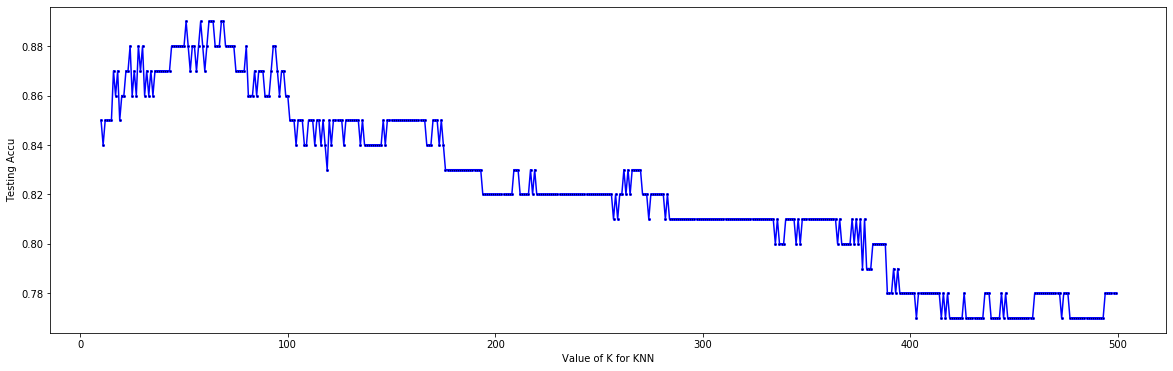

In [19]:
plt.figure(figsize=(20, 6))
plt.plot(k_range,scores_list,color='blue', marker='o',
         markerfacecolor='black', markersize=2)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accu")

Text(0, 0.5, 'Mean Error')

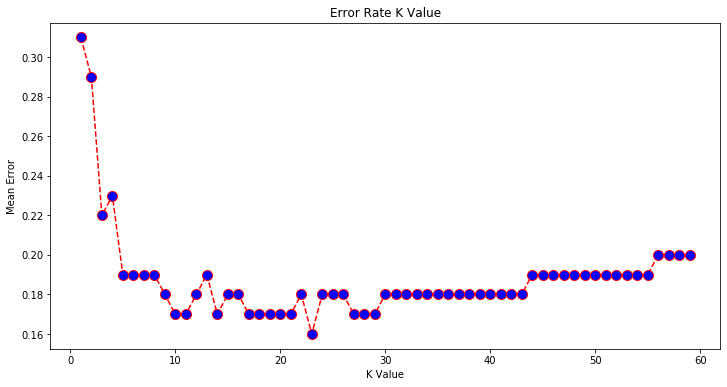

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [8]:
from pylab import rcParams
from matplotlib.colors import ListedColormap
def classify_and_plot(X, y):

    
    ''' 
    split data, fit, classify, plot and evaluate results 
    '''
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 41)
    print(X.shape)
    print(y.shape)

    # init vars
    n_neighbors = 29
    h           = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    rcParams['figure.figsize'] = 5, 5
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNN(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points, x-axis = 'Glucose', y-axis = "BMI"
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)   
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("0/1 outcome classification (k = %i, weights = '%s')" % (n_neighbors, weights))
        plt.show()
        fig.savefig(weights +'.png')

        # evaluate
        y_expected  = y_test
        y_predicted = clf.predict(X_test)

  

(723, 2)
(723,)


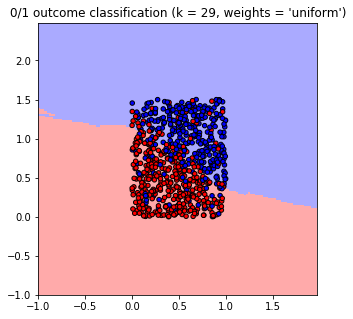

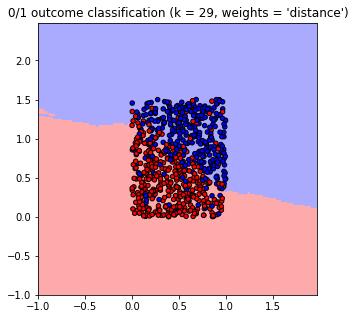

In [9]:
X = data_train.values[:, 0:2]
y = data_train.values[:, 3]


classify_and_plot(X, y)

In [10]:

def accuracy(k, X_train, y_train, X_test, y_test):
    '''
    compute accuracy of the classification based on k values 
    '''
    # instantiate learning model and fit data
    knn = KNN(n_neighbors=k)    
    knn.fit(X_train, y_train)
    
    # predict the response
    pred = knn.predict(X_test)
    
    # evaluate and return  accuracy
    return (metrics.accuracy_score(y_test, pre))

rows_nbr = X_all.shape[0]
def classify_and_plot(X, y):
    ''' 
    split data, fit, classify, plot and evaluate results 
    '''
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)
    best_n_neighbours = 9# np.argmax(np.array([accuracy(k, X_train, y_train, X_test, y_test) for k in range(1, int(rows_nbr/2))])) + 1
    print('----------------------------------------------------------------------')
    print('For best accuracy use k = ', best_n_neighbours)
    print('----------------------------------------------------------------------')
    
    # init vars
    n_neighbors = best_n_neighbours
    h           = .02  # step size in the mesh
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])
    
    rcParams['figure.figsize'] = 5, 5
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNN(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)
    
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
        y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
        # Plot also the training points, x-axis = 'Glucose', y-axis = "BMI"
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)   
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("0/1 outcome classification (k = %i, weights = '%s')" % (n_neighbors, weights))
        plt.show()
        fig.savefig(weights +'.png')
    
        # evaluate
        y_expected  = y_test
        y_predicted = clf.predict(X_test)
        
        # print results
        print('----------------------------------------------------------------------')
        print('Classification report')
        print('----------------------------------------------------------------------')
        print('\n', classification_report(y_expected, y_predicted))
        print('----------------------------------------------------------------------')
        print('Accuracy = %5s' % round(accuracy(n_neighbors, X_train, y_train, X_test, y_test), 3))
        print('----------------------------------------------------------------------')


In [11]:
classify_and_plot(X_all, y_all)

----------------------------------------------------------------------
For best accuracy use k =  9
----------------------------------------------------------------------


ValueError: query data dimension must match training data dimension

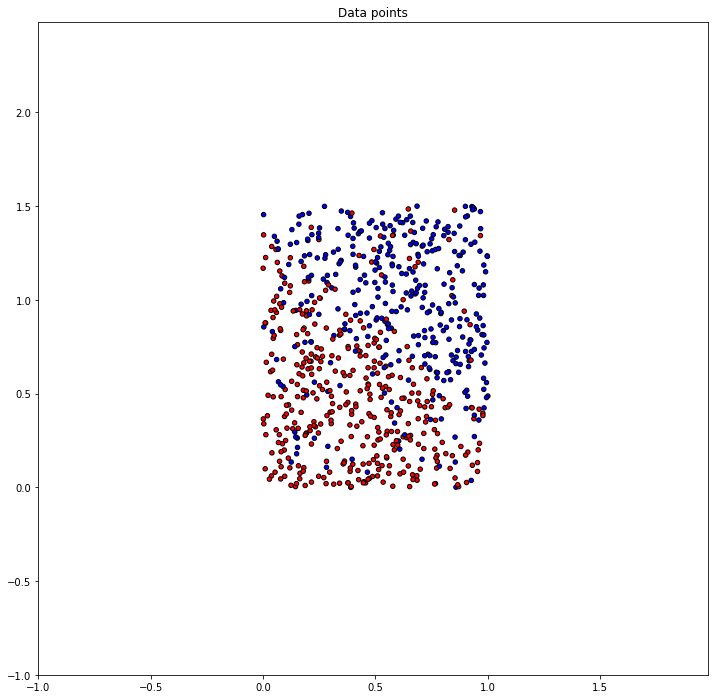

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

# import some data to play with
iris = datasets.load_iris()
# take the first two features
X = data_train.values[:, 0:2]
#print(X)
y = data_train.values[:, 3]
h = .02  # step size in the mesh


#plt.pcolormesh(xx, yy, [pre], cmap=cmap_light)
# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
plt.figure(figsize=(12, 12))
plt.scatter(X[:, 0], X[:, 1],c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
###Preparing for elbowMethod###
Sum_of_squared_data = []
scores = {}
K = range(1,7)
for k in K:
    km = KNN(n_neighbors=k)
    km = km.fit(X_train,y_train)
    Sum_of_squared_data.append(km.inertia _)

In [ ]:
plt.plot(K, Sum_of_squared_data, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNN(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    accuracy_score = metrics.accuracy_score(y_test, pred_i)
    print(i," ",accuracy_score)
    
    

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')